# Scikit-learn
[scikit-learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [1]:
import sklearn
sklearn.__version__

'0.21.2'

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])
dataset = pd.concat([data, target], axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test =\
    train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1])

데이터가 적은데 `train_test_split`을 하게되면 **데이터 누수(leakage) 문제**가 발생할 수 있음

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn.predict(X_test)

array([1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0])

In [11]:
y_test.values

array([1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0])

In [12]:
np.mean(knn.predict(X_test) == y_test)

0.9736842105263158

In [13]:
knn.score(X_test, y_test)

0.9736842105263158

In [14]:
knn.predict([[3, 3, 3, 3]])

array([1])

선형 알고리즘은 explainable하지만 데이터가 선형으로 이루어진 경우는 거의 없기 때문에 자주 쓰이지는 않는다.

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
lr.fit(X_test, y_test)
lr.score(X_test, y_test)

0.9736842105263158

데이터가 적을 때는 성능이 들쭉날쭉하며, 성능이 대체로 좋아보이기 때문에 `Overfitting`으로 보이지만 아니다. 더 정확히는 `Underfitting`이라고 할 수 있다.

- **Neural Network**같은 경우, 데이터가 많으면 많을 수록 성능이 좋아진다.
- **Decision Tree**는 각 가지가 룰(rule)로 만들 수 있어 시스템화 하기가 좋다.

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_test, y_test)
tree.score(X_test, y_test)

1.0

참고: [CART, Classification And Regression Trees](http://www.math.snu.ac.kr/~hichoi/machinelearning/lecturenotes/CART.pdf)

In [17]:
tree.decision_path(X_test).toarray()

array([[1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0,

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9473684210526315

feature enginering

`feature_importances_`을 통해 중요한 feature만 남겨놓는 것이 가능하다.

In [19]:
rfc.feature_importances_

array([0.09365324, 0.02795984, 0.46079658, 0.41759034])

scikit-learn에서는 다른 여러 모델들도 지원해줌

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Dummy Model은 사람이 하는 행동처럼 분류하며, 성능 평가의 기준이 되기 위해 사용한다.

In [21]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_test, y_test)
dummy.score(X_test, y_test)

0.34210526315789475

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
knn.score(X_test, y_test)

0.9736842105263158

## Cross Validation

/home/hsm/.venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/hsm/.venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


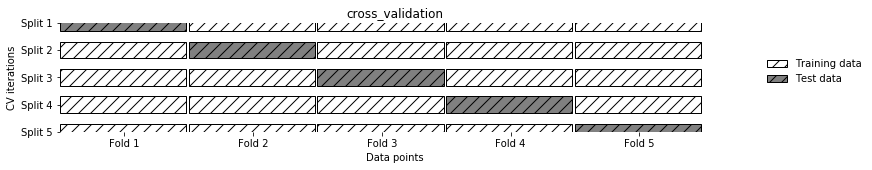

In [24]:
import mglearn
%matplotlib inline
mglearn.plots.plot_cross_validation()

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(), data, target.values.ravel(), cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

### 성능 비교

In [26]:
%time np.mean(cross_val_score(KNeighborsClassifier(), data, target, cv=10, n_jobs=-1))

CPU times: user 78.1 ms, sys: 344 ms, total: 422 ms
Wall time: 2.33 s


0.9666666666666668

In [27]:
from sklearn.svm import SVC

In [28]:
%time np.mean(cross_val_score(SVC(), data, target, cv=10, n_jobs=-1))

CPU times: user 0 ns, sys: 46.9 ms, total: 46.9 ms
Wall time: 40.7 ms


0.9800000000000001

## GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'n_jobs': [-1]}
gscv = GridSearchCV(KNeighborsClassifier(),
                    param_grid,
                    cv=10,
                    iid=True,
                    n_jobs=-1)

In [30]:
gscv.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=True, n_jobs=-1,
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
gscv.score(X_test, y_test)

1.0

In [32]:
gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
gscv.best_params_

{'n_jobs': -1, 'n_neighbors': 3}

In [34]:
pd.DataFrame(gscv.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00217264,0.00352023,0.00849292,0.00696206,0.0074955,0.00477436,0.00335381,0.00354016,0.00874553,0.00713608
std_fit_time,0.000565515,0.00223297,0.00136545,0.00277508,0.00323908,0.00342659,0.00202406,0.000697152,0.00161905,0.00334576
mean_score_time,0.1064,0.108918,0.114282,0.111949,0.111127,0.108509,0.107027,0.107363,0.114096,0.111921
std_score_time,0.00108208,0.00271562,0.00100697,0.00237599,0.00196658,0.00270935,0.00101785,0.00164135,0.000639673,0.00409109
param_n_jobs,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
param_n_neighbors,3,4,5,6,7,8,9,10,11,12
params,"{'n_jobs': -1, 'n_neighbors': 3}","{'n_jobs': -1, 'n_neighbors': 4}","{'n_jobs': -1, 'n_neighbors': 5}","{'n_jobs': -1, 'n_neighbors': 6}","{'n_jobs': -1, 'n_neighbors': 7}","{'n_jobs': -1, 'n_neighbors': 8}","{'n_jobs': -1, 'n_neighbors': 9}","{'n_jobs': -1, 'n_neighbors': 10}","{'n_jobs': -1, 'n_neighbors': 11}","{'n_jobs': -1, 'n_neighbors': 12}"
split0_test_score,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
split1_test_score,1,1,1,1,1,1,0.8,1,1,1
split2_test_score,1,1,1,1,1,1,1,1,1,1


---

In [35]:
import seaborn as sns
iris = sns.load_dataset('iris')

## Label Encoding

In [36]:
iris.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris.species)
le.transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
le.fit_transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
le.inverse_transform([2])

array(['virginica'], dtype=object)

In [40]:
pd.get_dummies(iris.species)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


## One-Hot-Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder()
ohe.fit(iris[['species']])
ohe.transform(iris[['species']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [43]:
ohe.fit_transform(iris[['species']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [44]:
ohe.inverse_transform([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])

array([['setosa'],
       ['versicolor'],
       ['virginica']], dtype=object)

## Scaler
- Scaling은 empirical가 중요함
- RobustScaler는 아웃라이어에 좋음

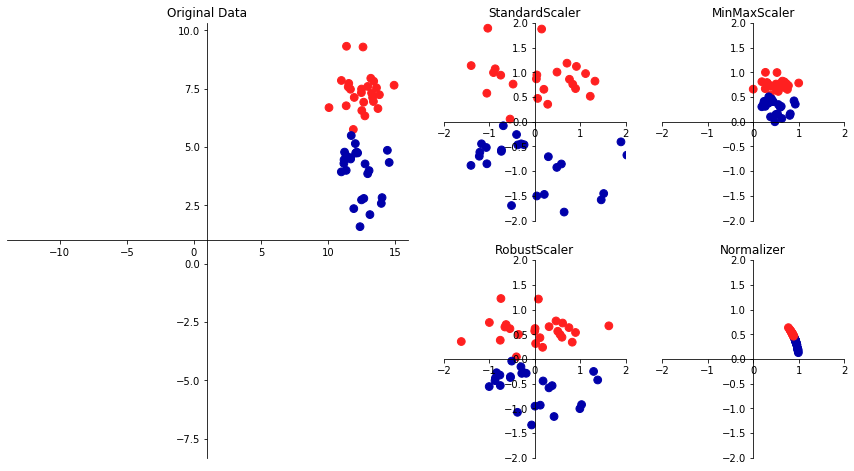

In [45]:
mglearn.plots.plot_scaling()

scaling을 하기 전에 데이터를 visualization을 통해 최적이 scaler를 선택하는 것이 중요

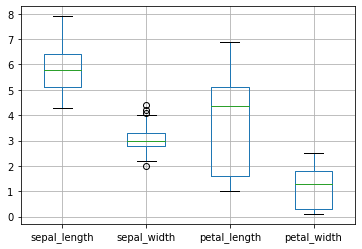

In [46]:
iris.boxplot()

학습이 얼마나 잘 되었는지 learning curve를 확인해본다.

In [47]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_score, test_score =\
    learning_curve(KNeighborsClassifier(), data, target, cv=10, n_jobs=-1)

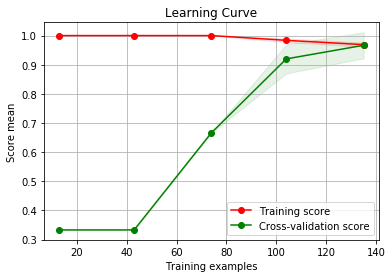

In [48]:
from sklearn_evaluation import plot
plot.learning_curve(train_score, test_score, train_sizes_abs)

In [49]:
from sklearn.model_selection import validation_curve

train_scores, test_scores =\
    validation_curve(KNeighborsClassifier(),
                 data,
                 target,
                 'n_neighbors', [3, 4, 5, 6, 7, 8, 9, 10],
                 cv=10,
                 n_jobs=-1)

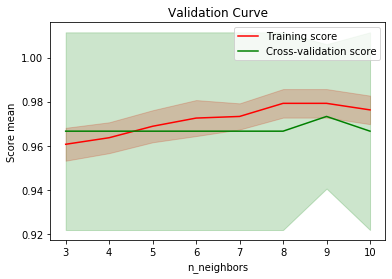

In [50]:
plot.validation_curve(train_scores, test_scores, [3, 4, 5, 6, 7, 8, 9, 10],
                      'n_neighbors')

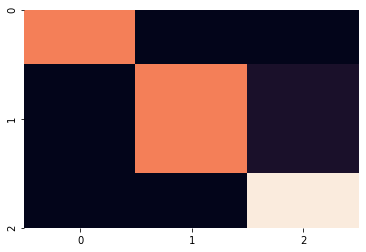

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, cbar=False)

## Pandas Profiling
https://github.com/pandas-profiling/pandas-profiling

In [52]:
from pandas_profiling import ProfileReport
ProfileReport(dataset)

In [53]:
html = ProfileReport(dataset).to_html()

In [54]:
with open('report.html', 'w') as file:
    file.write(html)